<a href="https://colab.research.google.com/github/andreiamferreira/inferential-statistics/blob/main/TESTE_T.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TESTES DE HIPÓTESES PARA MÉDIAS**

In [ ]:
import pandas as pd
import statistics as st
import numpy as np
import statsmodels.stats.weightstats as ssw
import scipy as stats
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_respostas = pd.read_excel("/content/drive/MyDrive/UFCSPA/NONO SEMESTRE/Estatística Inferencial/respostas.xlsx", sheet_name='Respostasaoform')

df_respostas.head(14)

,Carimbo de data/hora,Idade,Genero,Peso,Curso,Ano,AtivExtracurricular,AtivFisica,Motivo,Vidatvfísica,Atvfísicapratica,Frequenciatvfisica
0,2024-04-05 13:32:31.279,23,Feminino,75.0,Informática Biomédica,5,Sim,Não,Falta de tempo,Sim,NaN,NaN
1,2024-04-05 13:36:57.690,20,Feminino,53.0,Farmácia,3,Sim,Sim,NaN,NaN,Musculação,3.0
2,2024-04-05 13:38:06.018,24,Feminino,56.7,Farmácia,3,Sim,Não,Falta de tempo,Sim,NaN,NaN
3,2024-04-05 13:39:12.581,18,Feminino,64.0,Farmácia,1,Não,Sim,NaN,NaN,"Musculação, Corrida/caminhada",6.0
4,2024-04-05 13:39:30.622,22,Masculino,94.0,Farmácia,6,Sim,Sim,NaN,NaN,"Musculação, Esportes coletivos (ex.: futebol, ...",6.0
5,2024-04-05 13:39:43.838,22,Feminino,60.0,Farmácia,2,Sim,Sim,NaN,NaN,"Musculação, Dança",2.0
6,2024-04-05 13:41:05.693,23,Masculino,80.0,Informática Biomédica,4,Sim,Sim,NaN,NaN,"Musculação, Corrida/caminhada",3.0
7,2024-04-05 13:41:05.858,24,Feminino,70.0,Informática Biomédica,5,Sim,Não,Falta de tempo,Sim,NaN,NaN
8,2024-04-05 13:44:20.366,17,Não-binárie,51.0,Farmácia,1,Não,Não,Falta de tempo,Sim,NaN,NaN
9,2024-04-05 13:44:49.874,20,Feminino,50.0,Farmácia,1,Não,Não,Falta de tempo,Sim,NaN,NaN


<Axes: xlabel='Idade', ylabel='Count'>

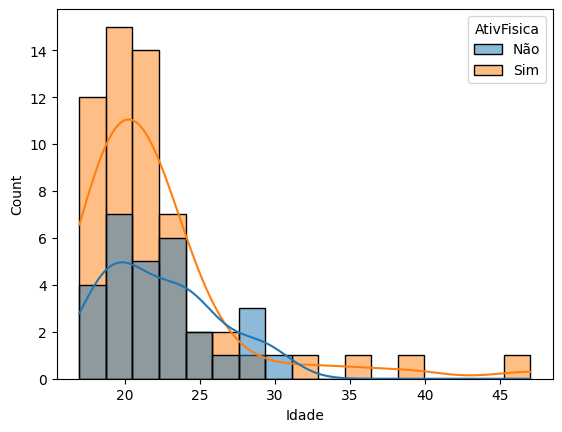

In [ ]:
sns.histplot(data=df_respostas, x="Idade",kde=True, hue="AtivFisica")

In [ ]:
dados = df_respostas["Idade"].describe()

dados

count    86.000000
mean     22.104651
std       4.824031
min      17.000000
25%      19.000000
50%      21.000000
75%      23.000000
max      47.000000
Name: Idade, dtype: float64

**H0 = hipótese conservadora, onde se assume como verdadeira e a questionamos om bases nos dados utilizados. H0 (média_pop = 20)**   
**H1 = Hipótese alternativa  representa aquilo que se quer verificar, ou seja, é a pergunta que buscamos responder. **                                 
**H1 (média_pop != 20) --> teste bilateral**                    
**significancia = 0.05**

In [ ]:
model = ssw.DescrStatsW(dados)
(estatistica_teste, valor_p, gl) = model.ttest_mean(value = 20,
                                                    alternative = "larger")



In [ ]:
estatistica_teste

1.1094890510853967

In [ ]:
valor_p

0.1519373272310725

In [ ]:
gl

7.0

             
Em geral, usa-se o nível de significância como alpha = 5%                         
Se p.value < alpha = rejeitamos H0, os dados apresentam evidências convincentes a favor de H1                                                
Se p_value > alpha = falhamos em rejeitar H0, os dados NÃO apresentam evidências convincentes a favor de H1.              
No nosso caso, não rejeitaremos a hipótese nula, ou seja, não temos evidências que a hipótese nula não é verdadeira.


## **Teste Bilateral**

In [ ]:
dados_1 = df_respostas.groupby(["AtivFisica"])[["Idade"]].describe()

dados_1

Idade                                                   
           count       mean       std   min   25%   50%   75%   max
AtivFisica                                                         
Não         29.0  22.310345  3.684945  17.0  19.0  21.0  24.0  30.0
Sim         57.0  22.000000  5.338539  17.0  19.0  21.0  23.0  47.0

In [ ]:
m_ativFisica, m_idade =  df_respostas.groupby(["AtivFisica"])[["Idade"]].mean().values.squeeze()

m_ativFisica, m_idade

(22.310344827586206, 22.0)

In [ ]:
n_ativFisica, n_idade =  df_respostas.groupby(["AtivFisica"])[["Idade"]].count().values.squeeze()

n_ativFisica, n_idade

(29, 57)

In [ ]:
std_ativFisica, std_idade =  df_respostas.groupby(["AtivFisica"])[["Idade"]].std().values.squeeze()


std_ativFisica, std_idade

(3.6849447396114563, 5.338539126015656)

In [ ]:
SE = np.sqrt((std_ativFisica**2/n_ativFisica)+(std_idade**2/n_idade))

SE

0.9839893771151812

In [ ]:
z_score = (m_ativFisica-m_idade)/SE

z_score

0.3153944898227076

In [ ]:
scipy.stats.norm.sf(np.abs(z_score)*100)*2

2.5020139299752145e-218

In [ ]:
scipy.stats.norm.cdf(np.abs(z_score)*100)*2

2.0